___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
___

Pedro Furquim de Campos Suarez

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Pedro Suarez\Documents\2 semestre\Ciências dos dados\CdD


In [3]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

def fxrenda(linha):
    if linha>0 and linha<=800:
        return "0 a 800"
    if linha>800 and linha<=1600:
        return "800 a 1600"
    if linha>1600 and linha<=2400:
        return "1600 a 2400"
    if linha>2400 and linha<=3200:
        return "2400 a 3200"
    if linha>3200 and linha<=4000:
        return "3200 a 4000"
    if linha>4000 and linha<=4800:
        return "4000 a 4800"
    if linha>4800 and linha<=5600:
        return "4800 a 5600"

In [4]:
dados=pd.read_csv('DOM2015.csv',sep=',')

tabelared=pd.DataFrame({
    'Condições_de_ocupação_do_domicílio':dados.V0207,
    'Telefone_celular':dados.V0220,
    'Telefone_fixo':dados.V2020,
    'Renda_domiciliar_mensal_per_capita': dados.V4621,
    'Estado':dados.UF
    })

tabelared.Condições_de_ocupação_do_domicílio = tabelared.Condições_de_ocupação_do_domicílio.astype('category')
tabelared.Condições_de_ocupação_do_domicílio.cat.categories = ('Próprio - já pago', 'Próprio - ainda pagando', 'Alugado', 'Cedido por empregador', 'Cedido de outra forma', 'Outra condição')

tabelared.Telefone_celular = tabelared.Telefone_celular.astype('category')
tabelared.Telefone_celular.cat.categories = ('Sim', 'Não')

tabelared.Telefone_fixo = tabelared.Telefone_fixo.astype('category')
tabelared.Telefone_fixo.cat.categories = ('Sim', 'Não')

a=tabelared[(tabelared.Renda_domiciliar_mensal_per_capita<5600)].dropna()
a.Renda_domiciliar_mensal_per_capita=a.Renda_domiciliar_mensal_per_capita.apply(fxrenda)
a

,Condições_de_ocupação_do_domicílio,Estado,Renda_domiciliar_mensal_per_capita,Telefone_celular,Telefone_fixo
0,Alugado,11,0 a 800,Sim,Não
2,Alugado,11,800 a 1600,Sim,Não
3,Próprio - já pago,11,0 a 800,Sim,Sim
4,Próprio - já pago,11,2400 a 3200,Sim,Não
5,Próprio - já pago,11,1600 a 2400,Não,Sim
6,Próprio - já pago,11,0 a 800,Sim,Não
7,Próprio - já pago,11,800 a 1600,Sim,Não
8,Alugado,11,800 a 1600,Sim,Sim
10,Próprio - já pago,11,1600 a 2400,Sim,Sim
11,Próprio - já pago,11,2400 a 3200,Sim,Sim


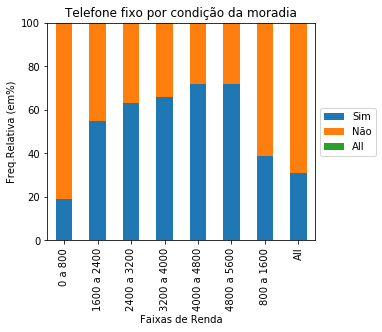

In [5]:
ct=pd.crosstab(a.Telefone_fixo,a.Renda_domiciliar_mensal_per_capita,margins=True,rownames=['Telefone Fixo'], colnames=['Faixas de Renda']).apply(percConvert, axis=0)
ct

ct = ct.iloc[0:5,:]
plot = ct.T.plot(kind='bar', stacked=True,title='Telefone fixo por condição da moradia')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

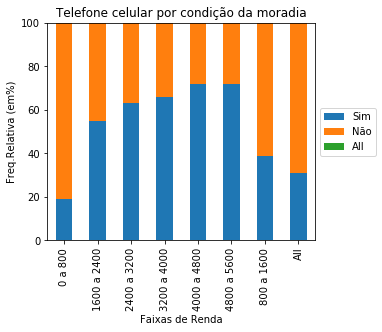

In [6]:
ct2=pd.crosstab(a.Telefone_fixo,a.Renda_domiciliar_mensal_per_capita,margins=True,rownames=['Telefone Fixo'], colnames=['Faixas de Renda']).apply(percConvert, axis=0)
ct2

ct2 = ct2.iloc[0:5,:]
plot = ct2.T.plot(kind='bar', stacked=True,title='Telefone celular por condição da moradia')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

___
## Conclusão 

Descreva aqui suas conclusões!